In [0]:
import tensorflow as tf

In [0]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print('GPU device not found')
else:
  print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
import numpy as np
import math
import os
import random
import zipfile
from matplotlib import pylab
import collections
from __future__ import print_function
from six.moves import range
from six.moves.urllib.request import urlretrieve
from sklearn.manifold import TSNE

In [0]:
url = 'http://mattmahoney.net/dc/'

In [0]:
def maybe_download(filename, expected_size):
  """Download a file if is not present at the location and check its size"""
  
  #if the file does not exist at location download it
  if not os.path.exists(filename):
    filename,_ = urlretrieve(url+filename, filename)
   
  #getting information form os
  statinfo = os.stat(filename)
  
  #checking filesize
  if statinfo.st_size == expected_size:
    print('Found and verified size  of {}'.format(filename))
    
  else:
    print(statinfo.st_size)
    raise Exception('Failed to verify ' + filename + ' Try downloading from browser')
    
  return filename
      
  
  
   

In [0]:
filename = maybe_download('text8.zip', 31344016)

Found and verified size  of text8.zip


In [0]:
#looking at the names of the files in the zipfile
with zipfile.ZipFile(filename) as f:
  print(f.namelist())
  words = tf.compat.as_str(f.read(f.namelist()[0]))

['text8']


In [0]:
# printing the first hundred words to see what we have got
print(words[1:100])

anarchism originated as a term of abuse first used against early working class radicals including t


In [0]:
# lets seperate words at whitespaces
words = words.split()
print(words[0:100])

['anarchism', 'originated', 'as', 'a', 'term', 'of', 'abuse', 'first', 'used', 'against', 'early', 'working', 'class', 'radicals', 'including', 'the', 'diggers', 'of', 'the', 'english', 'revolution', 'and', 'the', 'sans', 'culottes', 'of', 'the', 'french', 'revolution', 'whilst', 'the', 'term', 'is', 'still', 'used', 'in', 'a', 'pejorative', 'way', 'to', 'describe', 'any', 'act', 'that', 'used', 'violent', 'means', 'to', 'destroy', 'the', 'organization', 'of', 'society', 'it', 'has', 'also', 'been', 'taken', 'up', 'as', 'a', 'positive', 'label', 'by', 'self', 'defined', 'anarchists', 'the', 'word', 'anarchism', 'is', 'derived', 'from', 'the', 'greek', 'without', 'archons', 'ruler', 'chief', 'king', 'anarchism', 'as', 'a', 'political', 'philosophy', 'is', 'the', 'belief', 'that', 'rulers', 'are', 'unnecessary', 'and', 'should', 'be', 'abolished', 'although', 'there', 'are', 'differing']


In [0]:
len(words)

17005207

In [0]:
# creating a function to do the above steps
def read_data(filename):
  """Extracts the first file enclosed in a zipfile as a list of words"""
  
  with zipfile.ZipFile(filename) as f:
    data = tf.compat.as_str(f.read(f.namelist()[0])).split()
   
  return data


words = read_data(filename)
print("Total words {}".format(len(words)))  
    

Total words 17005207


In [0]:
# Build a dictionary and replace very rare words with an UNK token

#note that collections.counter(iterable) will give a collection where elements 
#are stored as dictionary keys while their count is stored as dictionary values

sample_sentence = ("Hello, what are you doing ? I am cooking food. What about you?"
                     " I am watitng for a bus. Hope I will meet you again")
print("Sample Sentence is ")
print(sample_sentence)
print()


#splitting the sentence into words
sample_words =  sample_sentence.lower().split()
print("Sample words are")
print(sample_words)
print()


#using the counter to generate dictionary of words with thier frequency
word_freq  = collections.Counter(sample_words)
print("Word frequencies are ")
print(word_freq)
print()

#to get the most common three words
top3_words = word_freq.most_common(3)
print("top3_words are ")
print(top3_words)
print()

#currently count houses only UNK token. We will add most popular words and
#their frequency to it.
count = [ ['UNK', -1]]
count.extend(top3_words)
print("count is ")
print(count)
print()

#creating our dictionary from most common words
dictionary = dict()
for word,freq in count:
  dictionary[word] = len(dictionary)
  
print("the dictionary is ")
print(dictionary)
print()

data = list()
unk_count = 0

#replacing each word in original dataset by its representation.
#rare words are replaced by index 0 (for UNK)
#hence instead of original sentence we will get a list of numbers.
#eg: - absistence means to avoid something.
#may become 0, 3500, 7, 2002, 1700 
#assuming absistence is a rare word and to is the 7th most frequent word.

for word in sample_words:
  if word in dictionary:
    index = dictionary[word]
  else:
    index = 0 #the index for UNK
    unk_count += 1
  data.append(index)

print("data(words in index representation) is")
print(data)
print()

#reverse dictionary to obtain words corresponding to their occurenece frequency
reverse_dictionary = dict(zip(dictionary.values(), dictionary.keys()))

print("reverse dictionary is")
print(reverse_dictionary)
print()
    

Sample Sentence is 
Hello, what are you doing ? I am cooking food. What about you? I am watitng for a bus. Hope I will meet you again

Sample words are
['hello,', 'what', 'are', 'you', 'doing', '?', 'i', 'am', 'cooking', 'food.', 'what', 'about', 'you?', 'i', 'am', 'watitng', 'for', 'a', 'bus.', 'hope', 'i', 'will', 'meet', 'you', 'again']

Word frequencies are 
Counter({'i': 3, 'what': 2, 'you': 2, 'am': 2, 'hello,': 1, 'are': 1, 'doing': 1, '?': 1, 'cooking': 1, 'food.': 1, 'about': 1, 'you?': 1, 'watitng': 1, 'for': 1, 'a': 1, 'bus.': 1, 'hope': 1, 'will': 1, 'meet': 1, 'again': 1})

top3_words are 
[('i', 3), ('what', 2), ('you', 2)]

count is 
[['UNK', -1], ('i', 3), ('what', 2), ('you', 2)]

the dictionary is 
{'UNK': 0, 'i': 1, 'what': 2, 'you': 3}

data(words in index representation) is
[0, 2, 0, 3, 0, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0]

reverse dictionary is
{0: 'UNK', 1: 'i', 2: 'what', 3: 'you'}



In [0]:
vocabulary_size = 50000

# creating a function to build_dataset using aboce mentioned methods
def build_dataset(words):
  #initializing count with UNK token
  count = [['UNK', -1]]
  
  #entering most common words into count with their frequencies
  #-1 as UNK will be one entry in the dictionary
  count.extend(collections.Counter(words).most_common(vocabulary_size - 1))
  
  #creating a dictionary with index representing frequency rankings.
  #0 for UNK, 1 for most frequent
  dictionary = dict()
  for word,freq in count:
    dictionary[word] = len(dictionary)
  
  #data is index representation of text with words represented by dictionary indices
  data = list()
  unk_count = 0
  
  for word in words:
    if word in dictionary:
      index = dictionary[word]
    else:
      index = 0 #index for UNK
      unk_count += 1
    data.append(index)
  
  #putting frquency of UNK token
  count[0][1] = unk_count
  
  #creating a reverse_dictionary to get words corresponding to rankings
  #reverse_dictionary[1] will give most frequent words (O reserved for UNK)
  reverse_dictionary = dict(zip(dictionary.values(), dictionary.keys() ))
  
  
  return data, count, dictionary, reverse_dictionary


data, count, dictionary, reverse_dictionary = build_dataset(words)
print("Most common words (+UNK)")
print(count[:5])
print()

print("Sample data")
print(data[:10])
print()

 
  
    

Most common words (+UNK)
[['UNK', 418391], ('the', 1061396), ('of', 593677), ('and', 416629), ('one', 411764)]

Sample data
[5234, 3081, 12, 6, 195, 2, 3134, 46, 59, 156]



In [0]:
print(len(dictionary))
print(len(reverse_dictionary))

50000
50000


In [0]:
#just checking whether data representation is correct or not
print(words[:2])
print(reverse_dictionary[5234])

['anarchism', 'originated']
anarchism


In [0]:
# generate batch for skip-gram model

#initializing data_index to 0
data_index = 0

def generate_batch(batch_size, num_skips, skip_window):
  global data_index
  assert batch_size % num_skips == 0
  
  #cant understand the use of below
  assert num_skips <= 2*skip_window
  
  #creating empty array for batch and since each word represented by number hence
  #1-D array of integers(upto vocab_size)
  batch =np.ndarray(shape=(batch_size), dtype=np.int32)
  #dont know why we need 2-D array with 1 as one of the dimensions here??
  labels =np.ndarray(shape=(batch_size,1), dtype=np.int32)
  
  #since our window is like  skip_window target skip_window
  span = 2*skip_window + 1
  
  #deque is list-like container with fast appends and pops on either end
  #creating a buffer with max_size as span
  buffer = collections.deque(maxlen=span)
  
  #creating buffer for the first target_word in the batch
  for _ in range(span):    
    #filling in buffer from data
    buffer.append(data[data_index])
    #moving to the next word in data. cant really figure out the use of len(data)
    #should be obsolete
    #edit- this function is used to generate batches during training since we will
    #have  to train for many iterations we will iterate over the whole dataset
    #again and again
    data_index = (data_index + 1) % len(data)
  
  
  """Note that the batch is made up of target_words*num_skips hence if we have
  bs = 8 and num_skips = 2 then we will have 4 target words each repeated 2 times
  while if bs=8, num_skips=4 then we will have 2 target words repeated 4 times each

  we pick labels of the target words from the skip_window hence num_skips<=2*skip_window
  note that the sliding window is moved by only a single word in each iteration.

  examples in sentence 'Chicago is a beautiful city'. If we have
  num_skips = 4, skip_window = 2 then we will have 
  'a' with labels ['is', 'beautiful', 'Chicago', 'city']"""


  #// for integer division hence should give us the total number of subsections in batch
  for i in range(batch_size// num_skips):
    
    # target label at center of the buffer.
    target = skip_window
    # targets_to_avoid depicts the words that do not have to be put in
    # the labels of a word. We dont want to have a word in its labels hence
    # we have started the list by adding the word to it
    labels_to_avoid = [skip_window]
    #the below will trigger false condition forcing to pick another label
    label = skip_window
    
    for j in range(num_skips):
      while label in labels_to_avoid:
        #picking a new random label from the skip window
        #if we have num_skips == 2*skip_window then we wont need it
        label = random.randint(0,span-1)
       
      #do not repeat a label already put inside
      #appending label to labels_to_avoid      
      labels_to_avoid.append(label)
      
      #i is each unique word, j is its jth repeatation in batch
      batch[i*num_skips + j]  = buffer[target]
      labels[i*num_skips + j,0] = buffer[label]
      
    #creating buffer for the next target_word in the batch(under loop on i)
    #that is moving the window by one word
    buffer.append(data[data_index])
    data_index = (data_index + 1) % len(data)
    
    
  return batch,labels
  

#printing the sample sentence
print('data: ', [reverse_dictionary[di] for di in data[:8]])
print()

#trying differnet values for parameters

for num_skips, skip_window in [(2,1), (4,2)]:
  data_index = 0
  batch,labels = generate_batch(batch_size =8, num_skips =num_skips, skip_window=skip_window)
  print("with num_skips = {} and skip_window = {} ".format(num_skips,skip_window))
  print("    batch: ", [reverse_dictionary[bi] for bi in batch])
  print("    labels: ",[reverse_dictionary[lb] for lb in labels.reshape(8)])
  print()
  
  

      
      

data:  ['anarchism', 'originated', 'as', 'a', 'term', 'of', 'abuse', 'first']

with num_skips = 2 and skip_window = 1 
    batch:  ['originated', 'originated', 'as', 'as', 'a', 'a', 'term', 'term']
    labels:  ['as', 'anarchism', 'a', 'originated', 'as', 'term', 'a', 'of']

with num_skips = 4 and skip_window = 2 
    batch:  ['as', 'as', 'as', 'as', 'a', 'a', 'a', 'a']
    labels:  ['anarchism', 'term', 'a', 'originated', 'term', 'originated', 'as', 'of']



In [0]:
#the main reason fpr using sampled_softmax is that
#each training example is of form (x, {t}) where x is conext and t is target class
#usually we are trying to figure P(y|x) that is the probability that the one
#target class is y given the context is x
#But if we include the whole vocabulary the
#num_classes is very high and hence calculations computationally very expensive
#thus what we do is we pick small set of sampled classes according to a sampling 
#function (call it Si).
#create a set of candidates Ci = (Si Union {t})
# we evaluate P(t =y|x,Ci), probaility that y is the target class given x and Ci

#creation of graph

batch_size = 128
embedding_size = 128
skip_window = 1
num_skips = 2

#dont know some of this part

#set of words to evaluate similaity on
valid_size = 16
#will pick above words only from the 100 most frequent words
valid_window = 100
#dont really understand the below code
#random.sample(population,k) returns a k length list of unique elements chosen
#from the population(without replacement)

#picking 16 words from 100 most frequent to evaluate
valid_examples = np.array(random.sample(range(valid_window), valid_size))
num_sampled = 64


graph = tf.Graph()

with graph.as_default():
  
  #Input data placeholders
  
  train_dataset = tf.placeholder(tf.int32, shape=[batch_size])
  train_labels  = tf.placeholder(tf.int32, shape=[batch_size,1])
  valid_dataset = tf.constant(valid_examples, dtype = tf.int32)
  
  
  #variables
  #an embedding representation for each word
  embeddings = tf.Variable(tf.random_uniform( [vocabulary_size, embedding_size], -1.0, 1.0))
  
  softmax_weights = tf.Variable(
                         tf.truncated_normal([vocabulary_size, embedding_size],
                                            stddev = 1.0/ math.sqrt(embedding_size)))
  
  softmax_biases = tf.Variable(tf.zeros([vocabulary_size]))
  
  
  #tf.nn.embedding_lookup(params,ids)  returns the embeddings of ids from params
  #where params are the embeddings og whole population
  #hence finding embeddings for training labels
  embed = tf.nn.embedding_lookup(embeddings,train_dataset)
  
  
  
  
  #This part is an attempt to save the embeddings so that they can be used later
  saver = tf.train.Saver({"embeddings":embeddings})
  
  
  
  
  #still have to figure out this part
  #computing the loss
  
  #note that num_sampled is the number of classes randomly sampled per batch
  #while num_classes is the total number of classes
  loss = tf.reduce_mean(
             tf.nn.sampled_softmax_loss(weights=softmax_weights, biases=softmax_biases,
                                       inputs=embed, labels=train_labels, num_sampled=num_sampled,
                                       num_classes = vocabulary_size))
  
  #Optimizer
  optimizer = tf.train.AdagradOptimizer(1.0).minimize(loss)
  
  
  norm = tf.sqrt(tf.reduce_sum(tf.square(embeddings),1, keepdims = True))
  normalized_embeddings = embeddings/norm
  
  valid_embeddings = tf.nn.embedding_lookup(normalized_embeddings, valid_dataset)
  similarity = tf.matmul(valid_embeddings, tf.transpose(normalized_embeddings))
  
  

In [0]:
# training the model
num_steps = 100001

with tf.Session(graph=graph) as session:
  tf.global_variables_initializer().run()
  print('Initialized')
  average_loss = 0
  
  for step in range(num_steps):
    # this works because data index is global variable and this is also
    # the reason for having (data_index + 1) % len(data) as we will train on same
    # batches again after ending
    batch_data, batch_labels = generate_batch(batch_size, num_skips, skip_window)
    feed_dict = {train_dataset : batch_data, train_labels : batch_labels}
    
    #WARNING: dont give l the name of loss
    _, l = session.run([optimizer, loss], feed_dict = feed_dict)
    
    average_loss += l
    
    if step%2000 == 0:
      if step > 0:
        #average loss is estimate of loss over last 2000 batches
        average_loss = average_loss/2000
       
      print("average loss at step {} is {} ".format(step, average_loss))
      #resetting average_loss
      average_loss = 0
      
    
    if step % 10000 == 0:
      sim = similarity.eval()
      for i in range(valid_size):
        valid_word = reverse_dictionary[valid_examples[i]]
        top_k = 8 #number of nearest neighbours
        #0 will give the word itseld
        nearest = (-sim[i,:]).argsort()[1:top_k+1]
        
        print("nearest to {}: ".format(valid_word), end='')      
        for k in range(top_k):
          close_word = reverse_dictionary[nearest[k]]
          print('{}, '.format(close_word), end='')
        print()
        
    final_embeddings = normalized_embeddings.eval()
    
  #saving the embeddings to the disk
  save_path = saver.save(session, "/content/saved_embeddings/embeddings_model.ckpt")
    
    
    

Initialized
average loss at step 0 is 7.569671630859375 
nearest to system: sadc, trisha, marxist, argumentative, yetzirah, ebionites, hfs, laos, 
nearest to his: whispers, unproductive, afternoons, corporatist, recruit, frankfort, trough, misunderstandings, 
nearest to it: excitotoxins, questions, lb, overseeing, expositor, comforts, appendices, wettest, 
nearest to UNK: statute, mediterranean, occurrences, pleasing, bellevue, indonesians, van, richthofen, 
nearest to be: flanked, installing, ahimsa, thermals, inf, berengar, franc, galactus, 
nearest to other: outputs, honeymoon, disjunction, verb, footballers, orange, facilities, adp, 
nearest to as: clipping, lipoprotein, cordova, penal, rockne, teardrop, tethys, pavia, 
nearest to three: bacon, consequentialism, channing, triton, gila, bijapur, malthus, silt, 
nearest to a: giving, immerse, blake, creditors, obsession, records, testimonies, well, 
nearest to people: shinogi, krahn, centric, contending, nsw, gren, ayling, titration,

In [0]:
num_points = 200

tsne = TSNE(perplexity = 30, n_components=2, init='pca', n_iter = 5000, method='exact')
two_d_embeddings= tsne.fit_transform(final_embeddings[1:num_points+1, :])


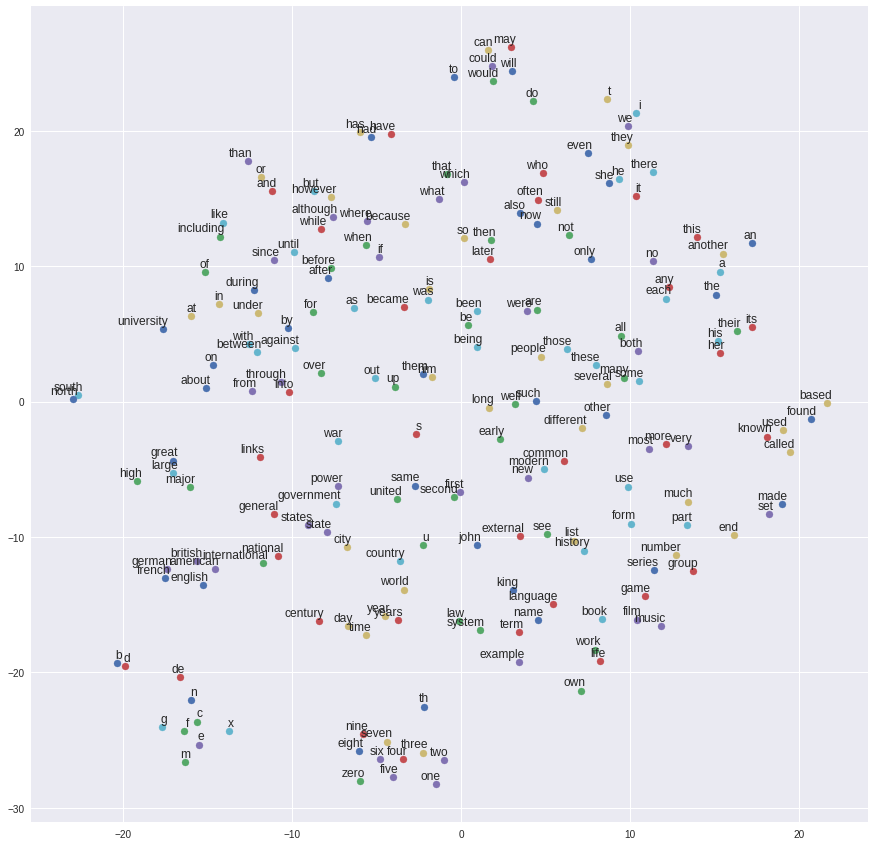

In [0]:
def plot(embeddings, labels):
  assert embeddings.shape[0] >= len(labels), 'More labels than embeddings'
  pylab.figure(figsize=(15,15))  # in inches
  for i, label in enumerate(labels):
    x, y = embeddings[i,:]
    pylab.scatter(x, y)
    pylab.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points',
                   ha='right', va='bottom')
  pylab.show()

words = [reverse_dictionary[i] for i in range(1, num_points+1)]
plot(two_d_embeddings, words)

In [0]:

from google.colab import files

In [0]:
cd /content/saved_embeddings/

/content/saved_embeddings


In [0]:
ls

checkpoint                                 embeddings_model.ckpt.index
embeddings_model.ckpt.data-00000-of-00001  embeddings_model.ckpt.meta


In [0]:
# files.download('/content/saved_embeddings/checkpoint')
files.download('/content/saved_embeddings/embeddings_model.ckpt.index')
files.download('/content/saved_embeddings/embeddings_model.ckpt.data-00000-of-00001')
files.download('/content/saved_embeddings/embeddings_model.ckpt.meta')

In [0]:
!mkdir saved_embeddings

In [0]:
cd saved_embeddings

/content/saved_embeddings
